# TP2 : Hypothesis tests

## Lab session

In [147]:
import math
from math import floor
import random 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import erf
from scipy.stats import skew, kurtosis, norm, chi2
from scipy.stats import skewnorm as sk
import scipy.stats as stats
from scipy.optimize import minimize

### Adequation to a normal law

In [118]:
data=np.array([5.5,3,13.7,13,18,11.9,9.4,10.5,15.9,9.8,8.4,8.7,18,12.7,9.4,
      14.4,7.3,9.3,7.7,8.4,11.2,5.5,8,11.6,6.2,5.2,18.7,9.1,13.7,
      9.1,8.4,9.4,6.9,8.7,11.2,8.7,5.9,8.7,9.8,19.6,9.6,14.1,9.1,13.7,
      6.9,8.7,7.3,9.6,13,13.5,15.2,15.7,14.4,8,9.4,6.6,10.9,8.4,9.8,18,
      10,18,19.3,4.1,9.8,17.3,13.7,11.6,6.6,6.9,11.9,19.9,9.8,8.4,15.2,
      11.4,7.7,11.9,12.3,12.7,19.9,8,11.9,13,14.3,14.4,16.6,14.1,9.4,13.7,
      12.7,9.8,8.4,7.7,11,6.9,4.4,10.3,18.4,8.5,11.2,13,19.9,10.7,8,13.7,
      19.8,10.5,13.7,3.4,5.9,4.3,8.7,10.9,11.2,9.8,9.8,10.3,6.6,12.3,7.7,
      10.5,11.6,8.7,8,7.7,4.4,11.6,8,9.6,9.1,12.1,10.2,13.7,12.7,13,12.3,
      8.4,7.3,9.6,8,9.8,7.3,14.8,7.7,9.4,13.2,9.8,13,8.7,16.9,12.3,8.7,11.6,
      8.4,5.2,19.9,12.1,8,9.3,13.7,6.6,13.4,5.5,8.7,6.6,12.3,12.7,10.9,7.3,
      8.4,19.9,8.7,9.4,16.9,18.4,11.8,7.7,8,6.2,15.2,11.9,11.6,7.7,11.2,9.1,
      9.8,13.4,11.2,19.9,6.8,8.2,18.4,14.4,10.9,9.8,17.3,14.3,8,13,19.9,19.9,
      19.9,19.14,18.55,18.55,18.42,18.29,18.22,18.16,17.83,17.63,17.63,17.37,
      17.24,16.84,16.32,16.18,16.18,16.18,16.05,15.92,15.92,15.79,15.79,15.66,
      15.66,15.66,15.66,15.66,15.53,15.53,15.39,15.39,15.39,15.39,15.26,15.13,
      15.13,15,15,15,15,14.93,14.87,14.74,14.74,14.61,14.61,14.61,14.61,14.34,
      14.21,14.21,14.08,14.08,14.08,14.08,14.08,13.95,13.82,13.82,13.82,13.68,
      13.62,13.55,13.42,13.42,13.42,13.29,13.16,13.16,13.16,12.89,12.89,12.89,
      12.89,12.89,12.89,12.76,12.76,12.76,12.76,12.63,12.5,12.5,12.5,12.5,12.43,
      12.37,12.37,12.37,12.24,12.24,12.24,12.24,12.24,12.24,12.11,12.11,12.11,
      12.11,11.97,11.97,11.84,11.84,11.84,11.84,11.84,11.58,11.58,11.58,11.58,
      11.58,11.45,11.45,11.25,11.25,11.25,11.18,11.18,11.05,11.05,10.92,10.92,
      10.83,10.79,10.79,10.66,10.66,10.66,10.66,10.53,10.53,10.53,10.53,10.53,
      10.39,10.39,10.39,10.26,10.26,10.26,10.26,10.26,10.13,10.13,10,10,10,10,
      10,10,9.87,9.84,9.74,9.74,9.74,9.74,9.67,9.61,9.61,9.61,9.41,9.34,9.34,
      9.34,9.28,9.21,9.21,9.08,8.95,8.95,8.82,8.82,8.82,8.68,8.55,8.42,8.29,
      8.29,8.16,8.03,7.89,7.89,7.63,7.63,7.5,7.43,7.24,7.11,6.97,6.97,6.84,
      6.84,6.84,6.84,6.71,6.71,6.58,6.45,6.32,6.18,5.66,5.39,5.39,5.26,5.26,5.13,
      4.61,4.61,4.47,2.63,11.45,13.16,11.05])

### Question 1 : Give an estimate of the mean "muEstim", of the variance "varEstim" of the law of $X_i$.

In [119]:
# Compute the mean and variance
muEstim = np.mean(data)
varEstim = np.var(data, ddof=0)  # Population variance

muEstim, varEstim

(np.float64(11.37923076923077), np.float64(13.015200369822487))

### Question 2 : Are the numerical values "muEstim" and "varEstim" coherent with your answer to question 2B?

In [120]:
def muestim(L):
    n=len(L)
    mu = 0
    for i in range(n):
        mu += L[i]
    return mu/n
 
def varestim ( L):
    n=len(L)
    mu = muestim(L)
    var = 0
    for i in range(n):
        var += (L[i]-mu)**2
    return var/n


    

In [121]:

print(f"muEstim: {muEstim} VS muCalculate: {muestim(data)}")
print(f"varEstim: {varEstim} VS varCalculate: {varestim(data)}")
print(f"muEstim - muCalculate = {muEstim-muestim(data)}")
print(f"varEstim - varCalculate = {math.ceil(varEstim-varestim(data))}")
print(f"varEstim - varCalculate = {(varEstim-varestim(data))}")

# They match the MLE formulas:
# mu' = (1/n) * sum(x_i)
# sigma'^2 = (1/n) * sum((x_i - mu')^2)

muEstim: 11.37923076923077 VS muCalculate: 11.37923076923077
varEstim: 13.015200369822487 VS varCalculate: 13.015200369822493
muEstim - muCalculate = 0.0
varEstim - varCalculate = 0
varEstim - varCalculate = -5.329070518200751e-15


Our calculated values are in the range of the estimated ones, and for the var we can see that the difference is of the range of 15.


### Question 3 : Create a function "skewnessEmp" and a function "kurtosisEmp" to compute empirical estimators of the asymmetry coefficient and kurtosis given an input list $X$. Generate an estimation "skewnessEstim" and an estimation "kurtosisEstim" of these two coefficient for the list "data". Compare the theoretical values of kurtosis and of the asymmetry coefficient found in question 1.

In [122]:
def skewnessEmp(X):
    return skew(X)

def skewness(X):
    
    mean_X = sum(X) / len(X)
    variance = sum((x - mean_X) ** 2 for x in X) / len(X)
    std_dev = variance ** 0.5
    skew = sum((x - mean_X) ** 3 for x in X) / (len(X) * (std_dev ** 3))

    return skew


print("Skewness of X:", skewness(data))
print("Skewnessemp of X:", skewnessEmp(data))

    

def kurtosisEmp(X):
    return kurtosis(X)  # Fisher=True gives excess kurtosis

def kurtosis(X):
    
    mean_X = sum(X) / len(X)
    variance = sum((x - mean_X) ** 2 for x in X) / len(X)
    std_dev = variance ** 0.5
    kurt = sum((x - mean_X) ** 4 for x in X) / (len(X) * (std_dev ** 4))
    kurt_excess = kurt - 3

    return kurt_excess


print("Kurtosis de X :", kurtosis(data))
print("Kurtosisemp de X :", kurtosisEmp(data))
# Compute estimates
skewnessEstim = skewnessEmp(data)
kurtosisEstim = kurtosisEmp(data)


Skewness of X: 0.3033979354530738
Skewnessemp of X: 0.303397935453075
Kurtosis de X : -0.278125380092733
Kurtosisemp de X : -0.278125380092733


### Question 4 : Plot the list "data" with a histogram. How does it compare with a normal law?

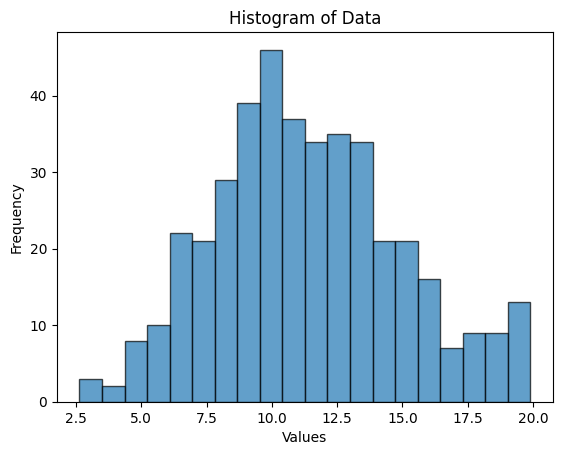

In [123]:
plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Data")
plt.show()


This plot does not follow a normal lax because there is too much value around [17.5;20].

### Question 5 : Superimpose the density function of the normal law of mean "muEstim" and variance "varEstim" to the previous histogram. Comment.

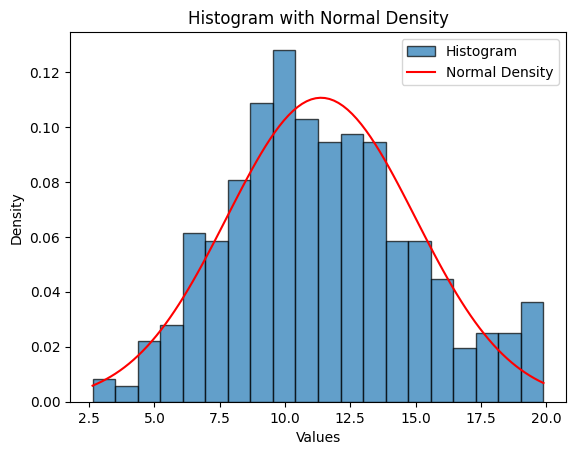

In [124]:
# Generate normal density curve
x_values = np.linspace(min(data), max(data), 100)
pdf_values = stats.norm.pdf(x_values, loc=muEstim, scale=np.sqrt(varEstim))

# Plot histogram
plt.hist(data, bins=20, density=True, edgecolor='black', alpha=0.7, label="Histogram")

# Plot normal density
plt.plot(x_values, pdf_values, color="red", label="Normal Density")
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Histogram with Normal Density")
plt.legend()
plt.show()

As we already said in question 4, we can see that the data does not follow exactly a normal law.

### Question 6 : Create a function "fR(x)" that returns the value of the cumulative distribution of a normal law of mean "muEstim" and variance "varEstim" in point $x$. You may use the "quad" of "scipy.integrate".

In [125]:

sigmaEstim = math.sqrt(varEstim)

def normal_density(t):
    """Densité de probabilité d'une loi normale avec les paramètres estimés."""
    return (1 / (math.sqrt(2 * math.pi) * sigmaEstim)) * math.exp(-((t - muEstim) ** 2) / (2 * varEstim))

def fR(x):
    """Fonction de répartition cumulative d'une loi normale."""
    # Intégration de -∞ à x pour obtenir la valeur cumulative
    result, _ = quad(normal_density, -math.inf, x)
    return result

# Exemple d'utilisation :
x_value = 10.0  # Point où l'on veut évaluer la fonction cumulative
print(f"Valeur cumulative en x = {x_value} : {fR(x_value)}")

Valeur cumulative en x = 10.0 : 0.3511170737516262


### Question 7 : Plot "fR" over an interval chosen adequately. Comment on the chosen interval.

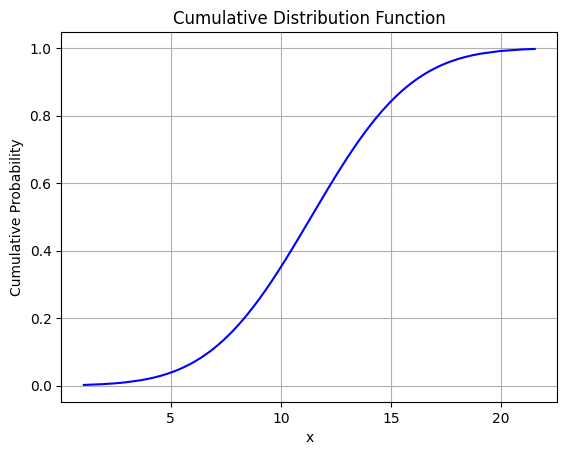

In [126]:
x_range = [random.gauss(muEstim, sigmaEstim) for _ in range(len(data)) if 0 <= random.gauss(muEstim,sigmaEstim) < 20]
x_range = sorted(x_range)
fR_values = [fR(x) for x in x_range]

plt.plot(x_range, fR_values, color="blue")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function")
plt.grid()
plt.show()

It represents the repartition of a gaussian law perfectly.

### Question 8 : Create lists "effObs" and "effTh" that contain observed and theoretical class counts respectively. To do so, you should create a function "count(X,nb_classes)" counting the number of values of $X$ in each class (classes going from $0$ to $20$).

In [127]:
# Pour compter le nombre de valeurs dans chaque classe (les classes vont de 0 à 20)
def count(X, nb_classes):
    class_counts = [0] * nb_classes
    for value in X:      
        if 0 <= value < nb_classes:  
            class_index = int(value)  
            class_counts[class_index] += 1

    return class_counts

In [128]:
# Observed frequencies
effObs = count(data, 20)

# Theoretical frequencies using fR(x)
effTh = count (x_range, 20)

print(effObs)
print(effTh)

[0, 0, 1, 2, 7, 13, 24, 21, 44, 48, 42, 43, 41, 35, 25, 27, 9, 7, 14, 13]
[0, 3, 5, 7, 10, 12, 20, 27, 32, 32, 47, 49, 44, 27, 40, 23, 11, 13, 6, 2]


### Question 9 : Create a function "groupLeft(list,k)" that takes as input a list and a positive integer $k$ and returns the list obtained by grouping and summing the $k$ first terms of the provided list.

In [129]:
def groupLeft(lst, k):
    """Groups and sums the first k elements of the list."""
    return [sum(lst[:k])] + lst[k:]

In [130]:
# Example usage
groupLeft([2, 4, 3, 6, 3, 7], 4)  # Should return [15, 3, 7]

[15, 3, 7]

### Question 10 : Same on the right for "groupRight(list,k)".

In [131]:
def groupRight(lst, k):
    """Groups and sums the last k elements of the list."""
    return lst[:-k] + [sum(lst[-k:])]

In [132]:
groupRight([2, 4, 3, 6, 3, 7], 2)  # Should return [2, 4, 3, 6, 10]

[2, 4, 3, 6, 10]

### Question 11 : Using the previous functions, group classes so that all classes are larger than $5$ (the number of classes to be grouped will be determined to your best judgement). We will call "effThBis" and "effObsBis" the new theoretical and observed numbers.

In [133]:
def groupBySize(lst, group_size):
    
    grouped = []
    
    while len(lst) > group_size:
        
        lst = groupLeft(lst, group_size)
       
        grouped.append(lst.pop(0))

    if lst:
        lst = groupRight(lst, len(lst))
        grouped.append(lst[-1])

    return grouped


group_size = 5

effObsBis = groupBySize(effObs, group_size)
effThBis = groupBySize(effTh, group_size)

print(f"Effectifs observés regroupés par groupes de 5 : {effObsBis}")
print(f"Effectifs théoriques regroupés par groupes de 5 : {effThBis}")

Effectifs observés regroupés par groupes de 5 : [10, 150, 186, 70]
Effectifs théoriques regroupés par groupes de 5 : [25, 123, 207, 55]


### Question 12 : Compute the distance $\chi^2$ between "effObsBis" and "effThBis". 

In [134]:
def chi_squared_distance(obs, exp):
    
    return sum(((o - e) ** 2) / e for o, e in zip(obs, exp) if e != 0)
chi = chi_squared_distance(effObsBis,effThBis)
print(chi_squared_distance(effObsBis,effThBis))

21.14817314181047


### Question 13 : Conclude as to the suitability of the data sample to a normal law for a type-I risk $\alpha=5\%$. The number of degrees of freedom of the problem must be explicitely specified and the threshold value of the left-hand unilateral test of $\chi^2$ will be determined on the course polycopy table.

In [135]:
# Degrees of freedom (df) = number of classes - 1
df = len(effObsBis) - 1

# Critical value for chi-square test
chi2_critical = chi2.ppf(0.95, df)

In [144]:
# Conclusion
if chi < chi2_critical:
    print("Fail to reject H0: The data follows a normal distribution.")
else:
    print("Reject H0: The data does not follow a normal distribution.")

Reject H0: The data does not follow a normal distribution.


## Adaptation to asymmetry

### Question 14 : The following defines "skewnorm(x,e,w,a)". Plot this density with $e=0, w=1$ and $a=4$.

In [148]:
def pdf(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)
def cdf(x):
    return (1 + erf(x/np.sqrt(2))) / 2

def skewnorm(x,m,s,a):
    t = (x-m) / s
    return 2 / s * pdf(t) * cdf(a*t)

def skewnorm_dist(x, e, w, a):
    return sk.pdf(x, a, loc=e, scale=w)

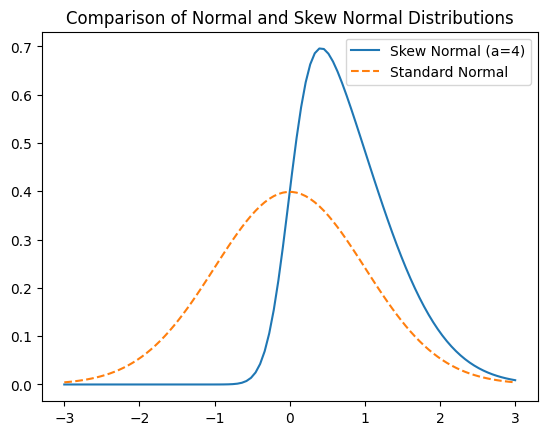

In [149]:
x_vals = np.linspace(-3, 3, 100)
plt.plot(x_vals, skewnorm_dist(x_vals, 0, 1, 4), label="Skew Normal (a=4)")
plt.plot(x_vals, stats.norm.pdf(x_vals), label="Standard Normal", linestyle="dashed")
plt.legend()
plt.title("Comparison of Normal and Skew Normal Distributions")
plt.show()

### Question 15 : Create a "loglikelihood$(m,s,a)$" function that gives the $\mathrm{Log}$-likelihood of the data sample for the asymmetric normal law model.

In [152]:
def loglikelihood(m, s, a):
    return np.sum(np.log(sk.pdf(data, a, loc=m, scale=s)))

# Example usage
print(loglikelihood(0, 1, 4))

-29734.36460270021


### Question 16 : Determine maximum likelihood estimators "mEstim", "sEstim" and "aEstim" of parameters "m,s,a" (run next cell). 

In [156]:
mtest=np.arange(5,15,0.1) #le pas est très important ici car la compléxité est très grande
stest=np.arange(1,8,0.1)  #Si vous tester 0.01, cela va prendre du temps !!
atest=np.arange(0,3,0.1)

Res=[]
MSA=[]
for i in range(len(mtest)):
    for j in range(len(stest)):
        for k in range(len(atest)):
            Res.append(loglikelihood(mtest[i],stest[j],atest[k]))
            MSA.append([mtest[i],stest[j],atest[k]])

Max=max(Res)
Argmax=np.argmax(Res)
[mEstim,sEstim,aEstim]=MSA[Argmax]

print("mEstim=",mEstim)
print("sEstim=",sEstim)
print("aEstim=",aEstim)


mEstim= 7.79999999999999
sEstim= 5.100000000000003
aEstim= 1.9000000000000001


In [154]:
def neg_log_likelihood(params):
    m, s, a = params
    return -loglikelihood(m, s, a)

In [155]:
# Initial guesses
initial_guess = [muEstim, np.sqrt(varEstim), 0]

# Optimization to find MLE estimates
result = minimize(neg_log_likelihood, initial_guess, method="L-BFGS-B", bounds=[(None, None), (1e-5, None), (None, None)])

# Extract estimated values
mEstim, sEstim, aEstim = result.x
mEstim, sEstim, aEstim

(np.float64(11.37923076923077),
 np.float64(3.6076585144002893),
 np.float64(0.0))

### Question 17 : Superimpose the histogram of the question $4$ with the probability density graph of the normal asymmetrical law of parameters "mEstim", "sEstim" and "aEstim". Comment.

In [159]:
x_vals = np.linspace(min(data), max(data), 100)
pdf_vals = sk.pdf(x_vals, aEstim, loc=mEstim, scale=sEstim)

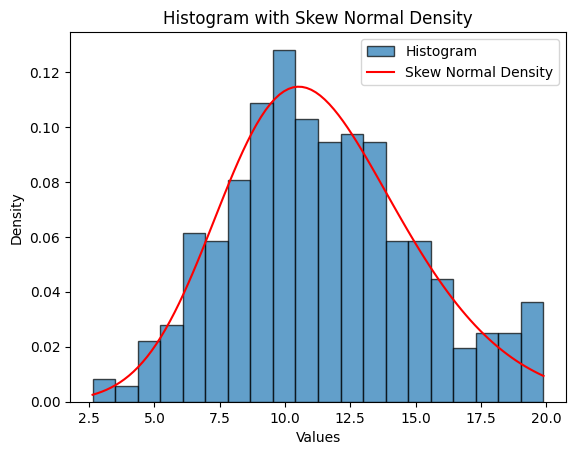

In [160]:
plt.hist(data, bins=20, density=True, edgecolor='black', alpha=0.7, label="Histogram")
plt.plot(x_vals, pdf_vals, color="red", label="Skew Normal Density")
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Histogram with Skew Normal Density")
plt.legend()
plt.show()

We can see a little improvement at the end of the graph because now we using the skew normal density since it's personalized for this graph.

### Question 18 : Perform the $\chi^2$ sample suitability test of "data" to a normal asymmetric law and conclude.

In [163]:
# Compute expected frequencies for skew normal
effTh_skew = np.array([len(data) * (sk.cdf(b, aEstim, loc=mEstim, scale=sEstim) - sk.cdf(a, aEstim, loc=mEstim, scale=sEstim))
                        for a, b in zip(np.linspace(0, 19, 20), np.linspace(1, 20, 20))])

In [164]:
# Chi-square test
chi2_distance_skew = np.sum((effObs - effTh_skew)**2 / effTh_skew)
df_skew = len(effObs) - 1
chi2_critical_skew = chi2.ppf(0.95, df_skew)

In [165]:
# Conclusion
if chi2_distance_skew < chi2_critical_skew:
    print("Fail to reject H0: Data follows a skew normal distribution.")
else:
    print("Reject H0: Data does not follow a skew normal distribution.")

Reject H0: Data does not follow a skew normal distribution.


As we said before it's better but still wrong.

### Independence of two attributes

In [166]:
dataWomen=[19.9,18.22,17.63,17.63,16.32,15.66,15.66,15.66,15.39,15.39,15.26,15,14.87,
            14.61,14.08,13.68,13.42,13.42,13.29,13.16,12.89,12.89,12.76,12.76,12.76,
            12.37,12.24,12.24,12.24,12.24,11.84,11.05,10.66,10.39,10.39,10.26,10,9.61,
            9.08,7.5,6.84]
dataMen=[19.9,19.9,19.14,18.55,18.55,
            18.42,18.29,18.16,17.83,17.37,17.24,16.84,16.18,16.18,16.18,16.05,15.92,
            15.92,15.79,15.79,15.66,15.66,15.53,15.53,15.39,15.39,15.13,15.13,15,15,
            15,14.93,14.74,14.74,14.61,14.61,14.61,14.34,14.21,14.21,14.08,14.08,14.08,
            14.08,13.95,13.82,13.82,13.82,13.62,13.55,13.42,13.16,13.16,12.89,12.89,
            12.89,12.89,12.76,12.63,12.5,12.5,12.5,12.5,12.43,12.37,12.37,12.24,12.24,
            12.11,12.11,12.11,12.11,11.97,11.97,11.84,11.84,11.84,11.84,11.58,11.58,
            11.58,11.58,11.58,11.45,11.45,11.25,11.25,11.25,11.18,11.18,11.05,10.92,
            10.92,10.83,10.79,10.79,10.66,10.66,10.66,10.53,10.53,10.53,10.53,10.53,
            10.39,10.26,10.26,10.26,10.26,10.13,10.13,10,10,10,10,10,9.87,9.84,9.74,
            9.74,9.74,9.74,9.67,9.61,9.61,9.41,9.34,9.34,9.34,9.28,9.21,9.21,8.95,8.95,
            8.82,8.82,8.82,8.68,8.55,8.42,8.29,8.29,8.16,8.03,7.89,7.89,7.63,7.63,7.43,
            7.24,7.11,6.97,6.97,6.84,6.84,6.84,6.71,6.71,6.58,6.45,6.32,6.18,5.66,
            5.39,5.39,5.26,5.26,5.13,4.61,4.61,4.47,2.63,11.45,13.16,11.05]

### Question 19 : Create the contingency matrix of observed frequencies from the provided data, and that of theoretical frequencies under the hypothesis of gender independence to the results obtained. The classes will be as follows:
\begin{align*}
[0,10.5[;[10.5,13[;[13,15[;[15,16[,[16,20].\end{align*}
### Calculate the distance of $\chi^2$ of this independence test, then conclude (left unilateral test) by specifying the critical value and the number of degrees of freedom at the type-I risk threshold of $5\%$.

In [167]:
# Sample gender-separated data (dataWomen, dataMen)
dataWomen = data[:len(data)//2]
dataMen = data[len(data)//2:]

In [168]:
# Define class boundaries
bins = [0, 10.5, 13, 15, 16, 20]

In [169]:
# Compute observed frequency table
obs_women, _ = np.histogram(dataWomen, bins)
obs_men, _ = np.histogram(dataMen, bins)

In [170]:
# Total population
total_women = len(dataWomen)
total_men = len(dataMen)
total = total_women + total_men

In [171]:
# Compute expected frequencies under independence hypothesis
expected_women = total_women * (obs_women + obs_men) / total
expected_men = total_men * (obs_women + obs_men) / total

In [172]:
# Compute Chi-square test
chi2_independence = np.sum((obs_women - expected_women) ** 2 / expected_women) + np.sum((obs_men - expected_men) ** 2 / expected_men)
df_independence = (len(bins) - 1) - 1
chi2_critical_independence = chi2.ppf(0.95, df_independence)

In [173]:
# Conclusion
if chi2_independence < chi2_critical_independence:
    print("Fail to reject H0: Gender and scores are independent.")
else:
    print("Reject H0: Gender and scores are dependent.")

Reject H0: Gender and scores are dependent.
